<a href="https://colab.research.google.com/github/Dhanusha1516/ShipmentSure-Predicting-On-Time-Delivery-Using-Supplier-Data/blob/main/on_time_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Upload the 'Train-new.csv' file**

In [1]:
from google.colab import files

# Upload the 'Train-new.csv' file
uploaded = files.upload()

# Verify if the file was uploaded
if 'Train-new.csv' in uploaded:
    print("'Train-new.csv' uploaded successfully!")
else:
    print("Failed to upload 'Train-new.csv'. Please try again.")


Saving Train new.csv to Train new.csv
Failed to upload 'Train-new.csv'. Please try again.


**Library**

**Insall catboost to run library**

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_auc_score, roc_curve, auc
)

In [4]:
pip install pandas pyarrow


**CatBoost ROC Curve**

In [5]:
!ls -F

 sample_data/  'Train new.csv'


**Load dataset as Train new.csv and converted onto parquet**

In [6]:
import pandas as pd

# Load your CSV
df = pd.read_csv('Train new.csv')

# Convert to Parquet
df.to_parquet('Train-new.parquet', index=False)

# Display the first 5 rows to confirm successful loading
display(df.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**Display first 5 rows**

In [7]:
display(df.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**Checking is my data set is upload or not**

In [8]:
!ls -F

 sample_data/  'Train new.csv'	 Train-new.parquet


**Display**

In [9]:
data = pd.read_csv("Train new.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


**Summary of data types**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**Rows and columns count**

In [11]:
data.shape

(10999, 12)

**Descriptive statistics all columns**

In [12]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


**Count missing values (column-wise)**



In [13]:
data.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


**List DataFrame / features**

In [14]:
print(data.columns.tolist())

['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


In [15]:
data.columns.tolist()

['ID',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

**Count unique values**

In [16]:
data.nunique()

,0
ID,10999
Warehouse_block,5
Mode_of_Shipment,3
Customer_care_calls,6
Customer_rating,5
Cost_of_the_Product,215
Prior_purchases,8
Product_importance,3
Gender,2
Discount_offered,65


**check duplicate values**

In [17]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)
# If duplicates exist, remove them
data = data.drop_duplicates()

Number of duplicate rows: 0


**Count target variable distribution.**

In [18]:
counts = data['Reached.on.Time_Y.N'].value_counts()
print(counts)

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


**virtualization**

**Visualize target variable distribution.**

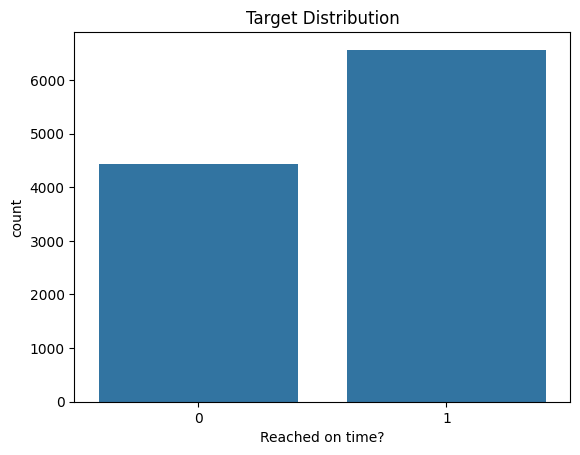

In [19]:
#Target Distribution
sns.countplot(x='Reached.on.Time_Y.N',data=data)
plt.title('Target Distribution')
plt.xlabel('Reached on time?')
plt.show()

**Visualize customer calls distribution (histogram)**

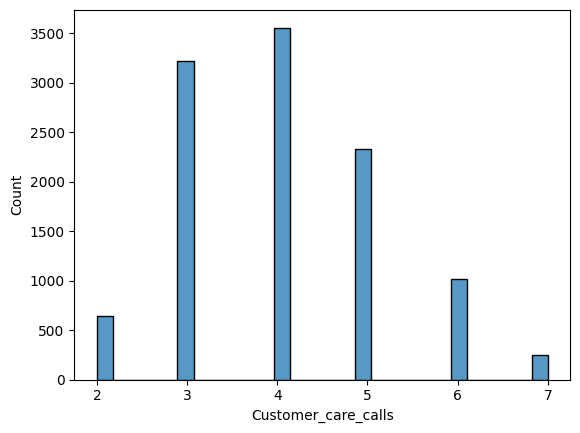

In [20]:
sns.histplot(data["Customer_care_calls"])
plt.show()

**Visualize product cost distribution**

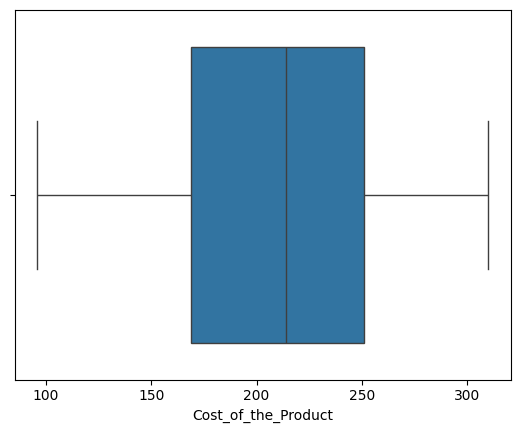

In [21]:
sns.boxplot(x=data["Cost_of_the_Product"])
plt.show()

**Visualize product weight distribution (histogram)**

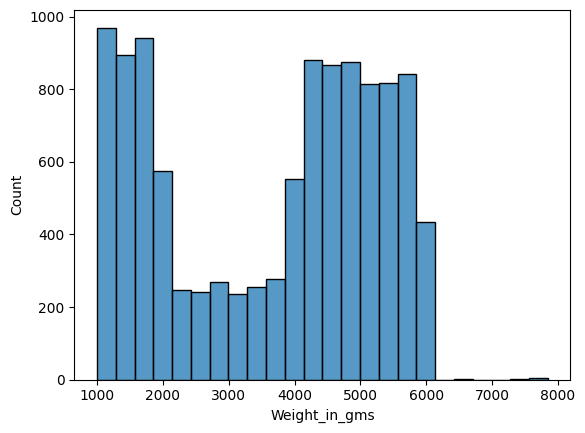

In [22]:
sns.histplot(data["Weight_in_gms"])
plt.show()

**Visualize warehouse block distribution**

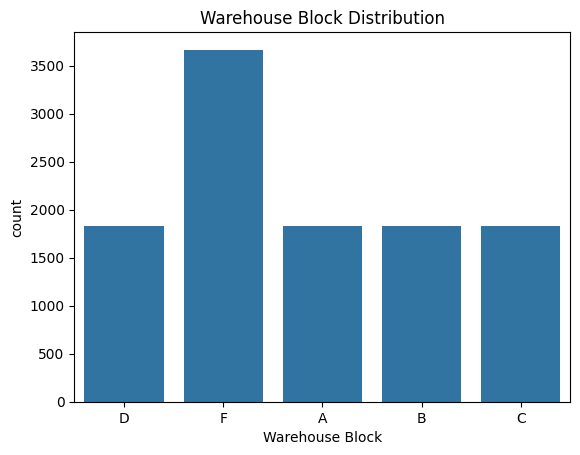

In [23]:
sns.countplot(x='Warehouse_block', data=data)
plt.title('Warehouse Block Distribution')
plt.xlabel('Warehouse Block')
plt.show()

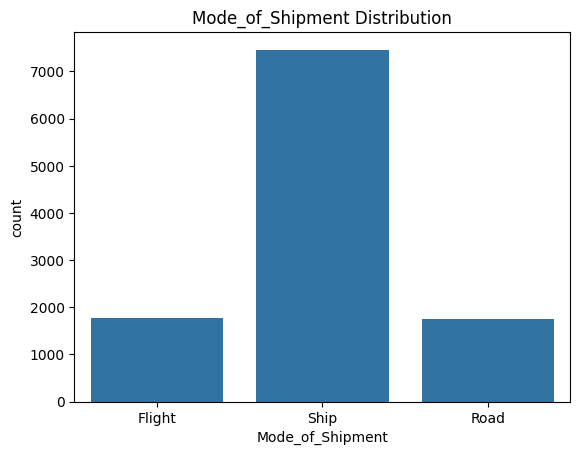

In [24]:
sns.countplot(x='Mode_of_Shipment', data=data)
plt.title('Mode_of_Shipment Distribution')
plt.xlabel('Mode_of_Shipment')
plt.show()

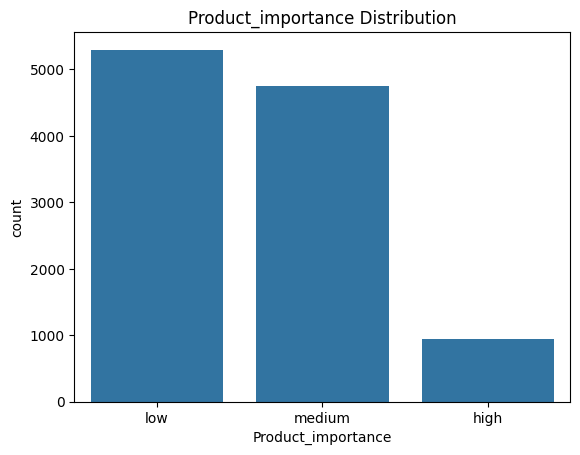

In [25]:
sns.countplot(x='Product_importance', data=data)
plt.title('Product_importance Distribution')
plt.xlabel('Product_importance')
plt.show()

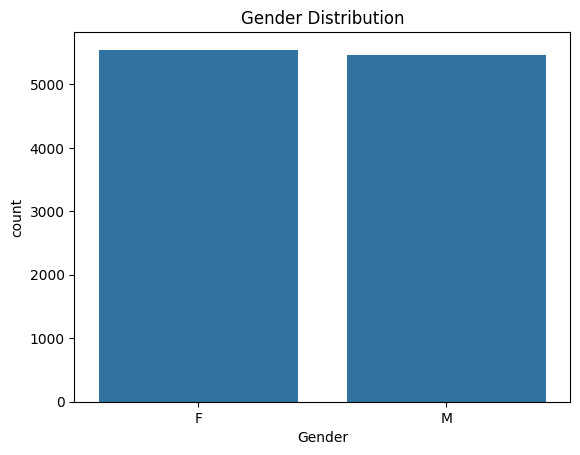

In [26]:
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

**Univariate analysis**

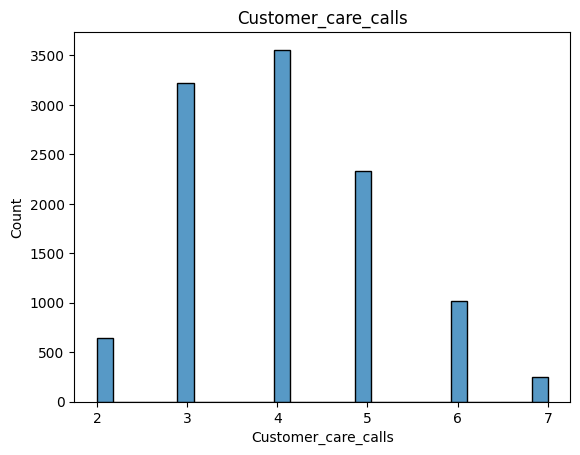

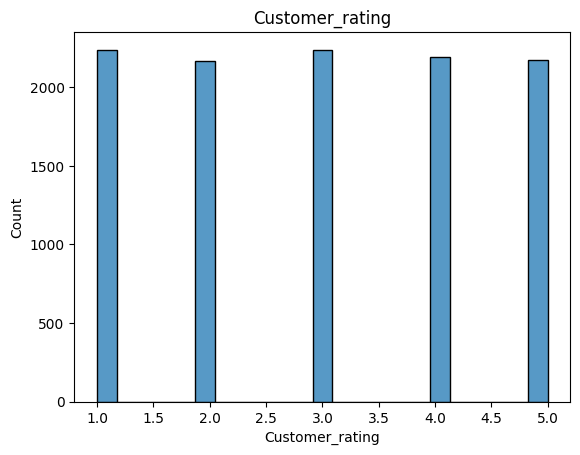

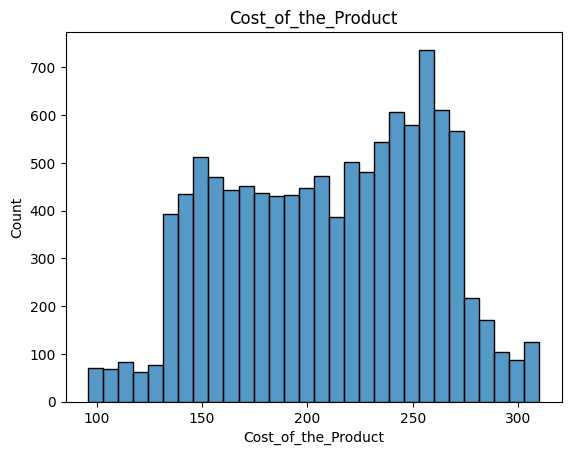

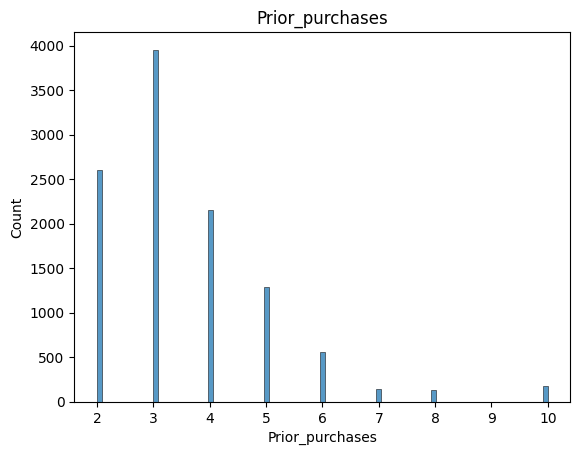

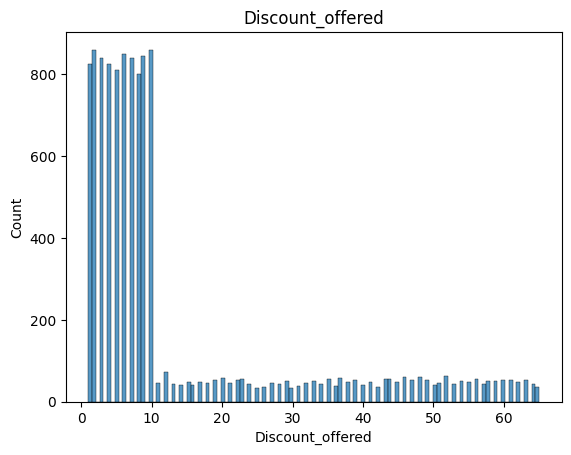

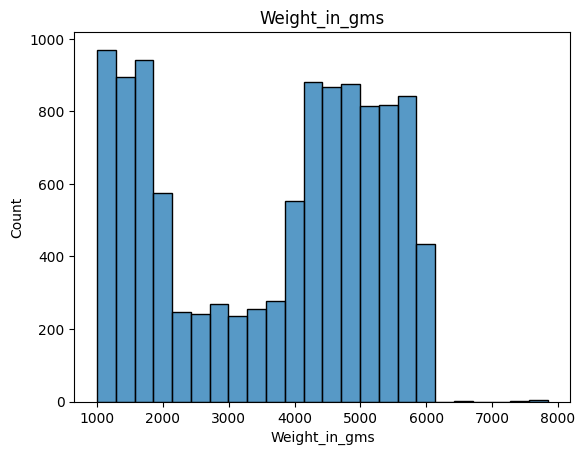

In [27]:
cols = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']
for z in cols:
    sns.histplot(data[z])
    plt.title(z)
    plt.show()

**Bivariate Analysis**

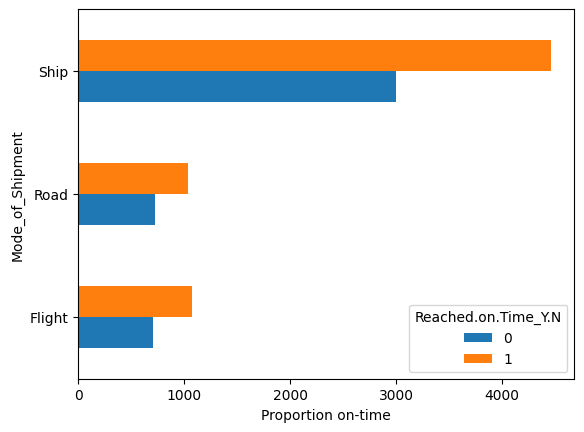

In [28]:
s = pd.crosstab(data['Mode_of_Shipment'],data['Reached.on.Time_Y.N'])
s.plot(kind='barh')
plt.xlabel('Proportion on-time')
plt.show()

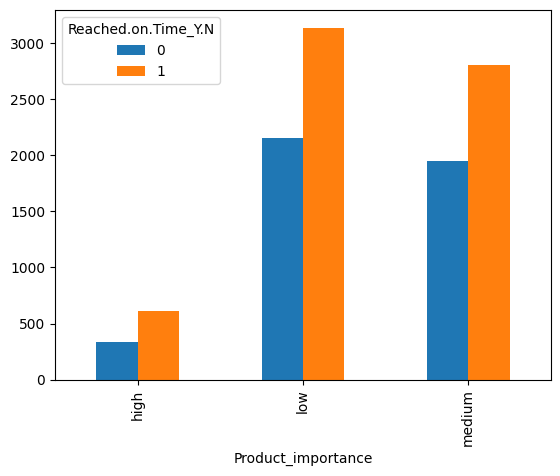

In [29]:
t = pd.crosstab(data['Product_importance'],data['Reached.on.Time_Y.N'])
t.plot(kind='bar')
plt.show()

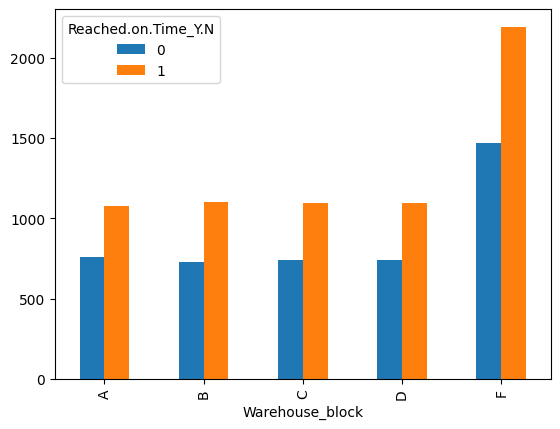

In [30]:
r = pd.crosstab(data['Warehouse_block'],data['Reached.on.Time_Y.N'])
r.plot(kind='bar')
plt.show()

**Heatmap**

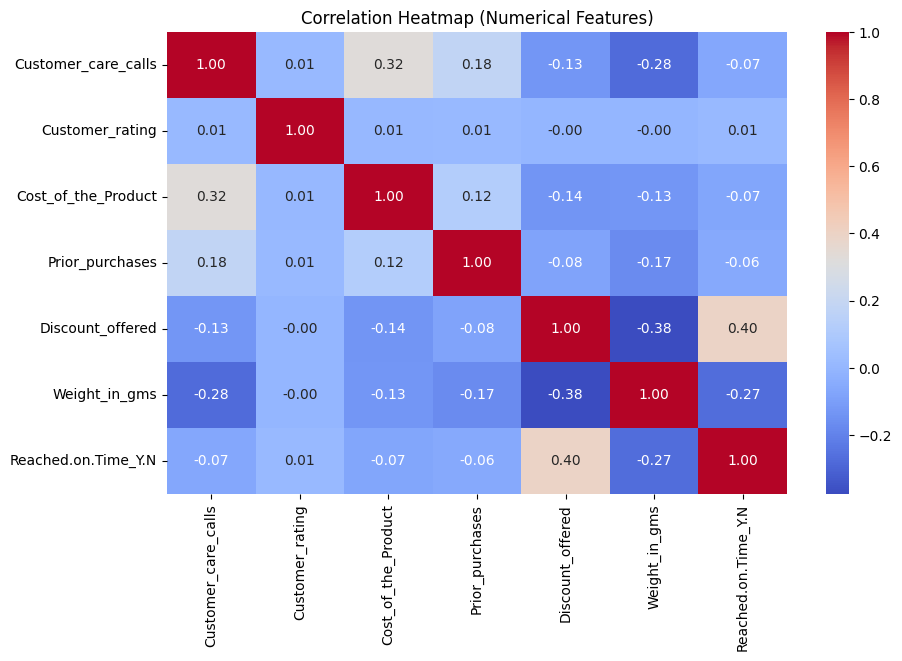

In [31]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
corr = data[cols + ['Reached.on.Time_Y.N']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

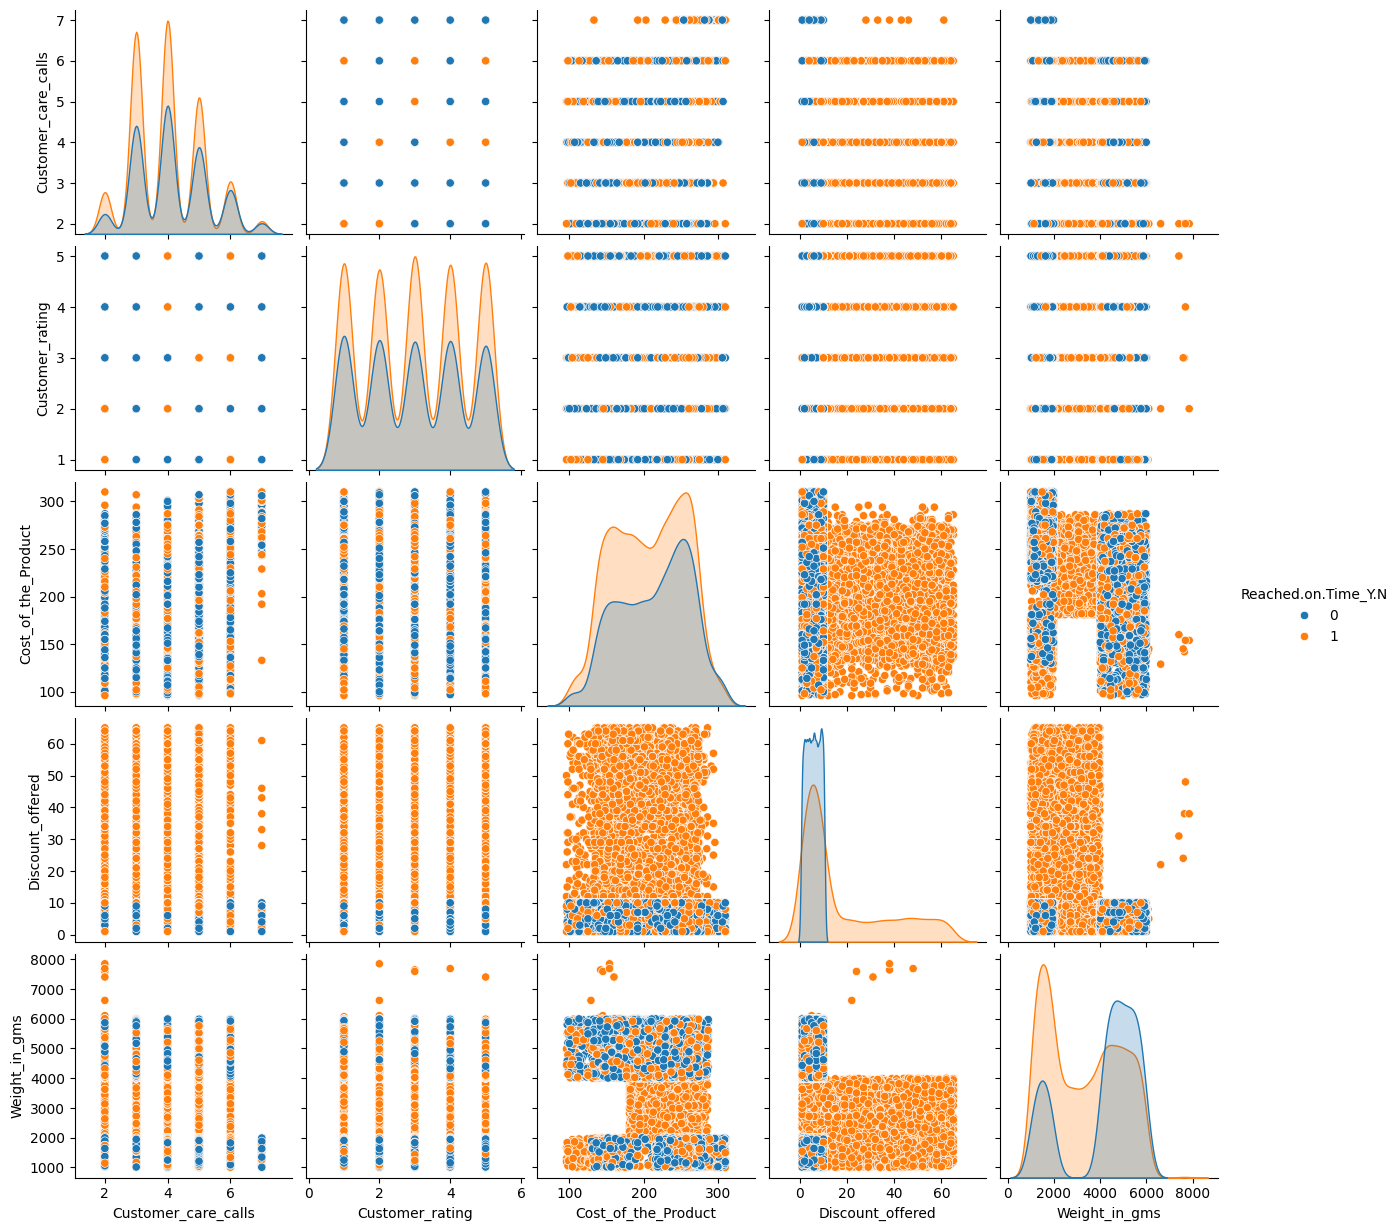

In [32]:
# Pairplot: shows scatter plots + histograms together
sns.pairplot(data[['Customer_care_calls','Customer_rating',
                    'Cost_of_the_Product','Discount_offered',
                    'Weight_in_gms','Reached.on.Time_Y.N']],
             hue='Reached.on.Time_Y.N')
plt.show()

**Outlier**

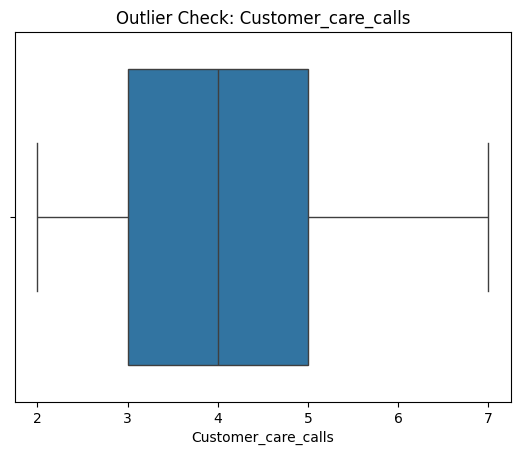

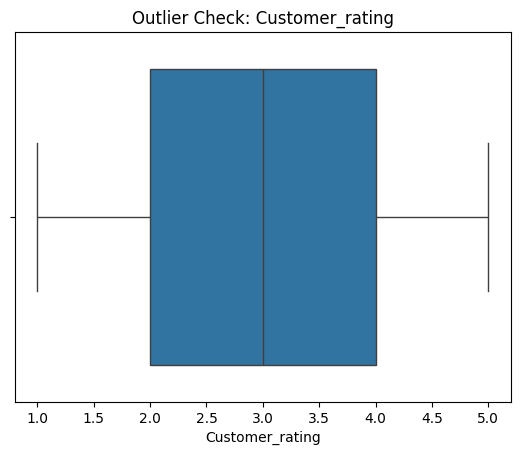

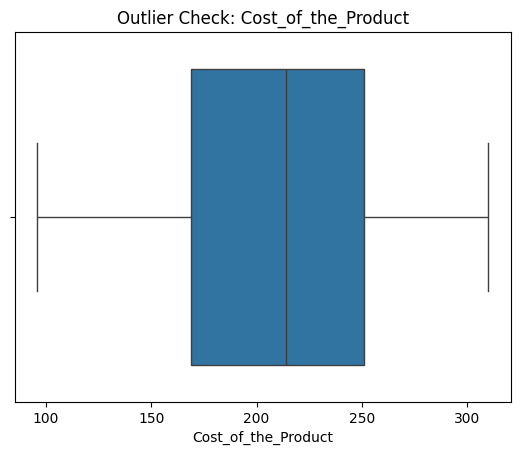

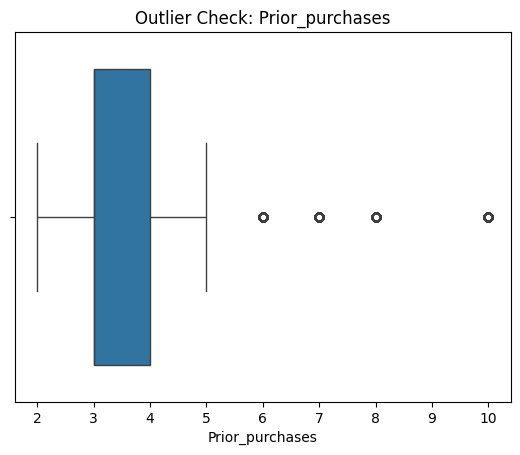

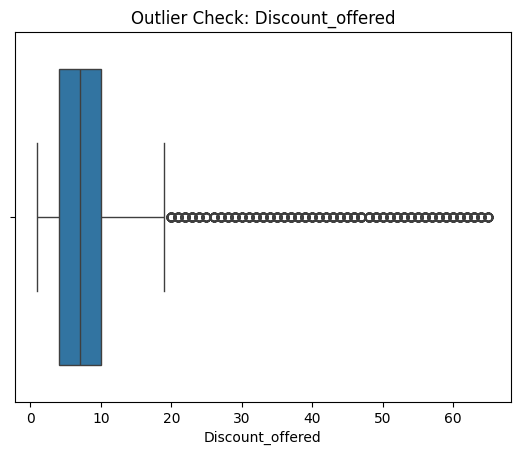

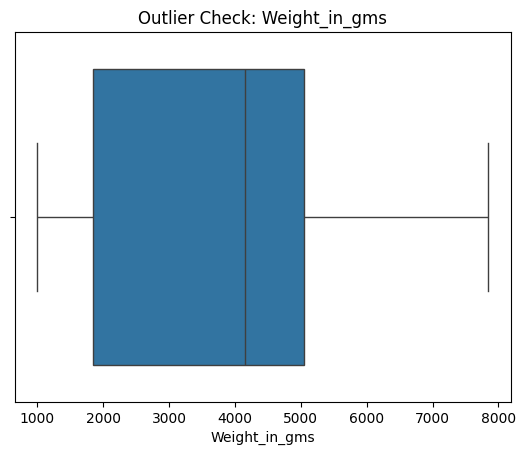

In [33]:
# Outlier detection using boxplots
for z in cols:
    sns.boxplot(x=data[z])
    plt.title(f'Outlier Check: {z}')
    plt.show()

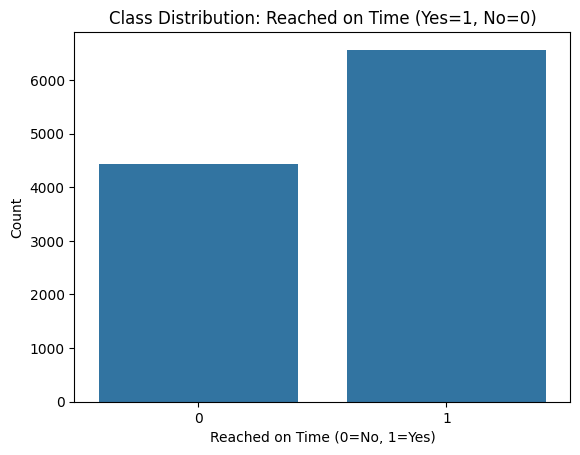

In [34]:
sns.countplot(x='Reached.on.Time_Y.N', data=data)
plt.title("Class Distribution: Reached on Time (Yes=1, No=0)")
plt.xlabel("Reached on Time (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

**Encoding**

**Label encoding and one hot encoding**

In [35]:
# Copy dataset
encode_data = data.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Label Encode
encode_data['Product_importance'] = le.fit_transform(encode_data['Product_importance'])
encode_data['Gender'] = le.fit_transform(encode_data['Gender'])

# One-Hot Encode nominal categorical columns
encode_data = pd.get_dummies(encode_data,
                             columns=['Warehouse_block', 'Mode_of_Shipment'],
                             drop_first=True)

# Check
encode_data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,4,2,177,3,1,0,44,1233,1,False,False,True,False,False,False
1,2,4,5,216,2,1,1,59,3088,1,False,False,False,True,False,False
2,3,2,2,183,4,1,1,48,3374,1,False,False,False,False,False,False
3,4,3,3,176,4,2,1,10,1177,1,True,False,False,False,False,False
4,5,2,2,184,3,2,0,46,2484,1,False,True,False,False,False,False


**Mode of Shipment Distribution from Encoded Data**

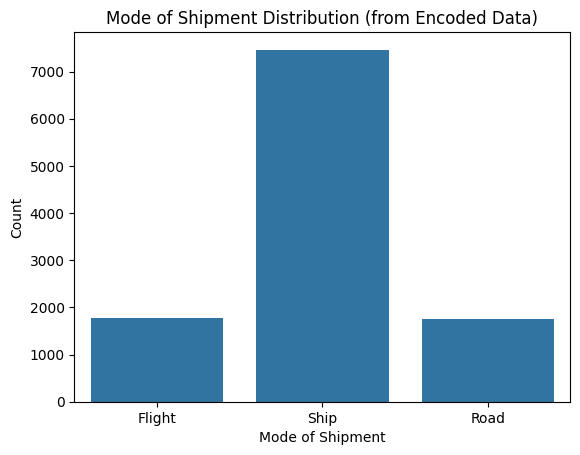

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reconstruct 'Mode_of_Shipment' from one-hot encoded columns in encode_data
def get_mode_of_shipment(row):
    if row['Mode_of_Shipment_Road']:
        return 'Road'
    elif row['Mode_of_Shipment_Ship']:
        return 'Ship'
    else:
        return 'Flight' # Assuming 'Flight' is the base category when both are False

# Apply the function to create a new 'Mode_of_Shipment_Reconstructed' column
encode_data['Mode_of_Shipment_Reconstructed'] = encode_data.apply(get_mode_of_shipment, axis=1)

# Visualize the distribution of the reconstructed 'Mode_of_Shipment'
sns.countplot(x='Mode_of_Shipment_Reconstructed', data=encode_data)
plt.title('Mode of Shipment Distribution (from Encoded Data)')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.show()

**Heatmap After Encoding**

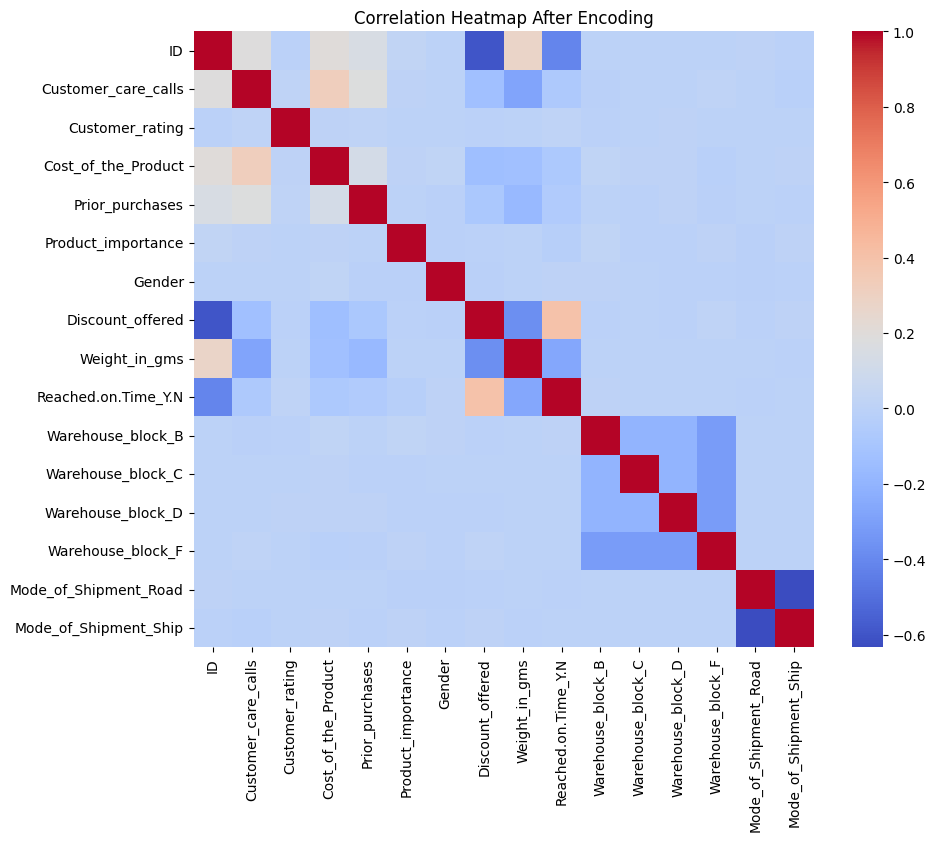

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(encode_data.drop(columns=['Mode_of_Shipment_Reconstructed']).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap After Encoding")
plt.show()

In [38]:
# Check only the encoded columns
# Convert boolean columns (from one-hot encoding) to 0/1 integers
for col in encode_data.select_dtypes(include=['bool']).columns:
    encode_data[col] = encode_data[col].astype(int)

# Display the head of the DataFrame to show the changes
display(encode_data.head())

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Mode_of_Shipment_Reconstructed
0,1,4,2,177,3,1,0,44,1233,1,0,0,1,0,0,0,Flight
1,2,4,5,216,2,1,1,59,3088,1,0,0,0,1,0,0,Flight
2,3,2,2,183,4,1,1,48,3374,1,0,0,0,0,0,0,Flight
3,4,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0,Flight
4,5,2,2,184,3,2,0,46,2484,1,0,1,0,0,0,0,Flight


**Standard Scaler**

In [39]:
# Initialize StandardScaler
std_scaler = StandardScaler()
# Columns to normalize
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Apply to numerical columns
std_scaled_data = encode_data.copy()
std_scaled_data[num_cols] = std_scaler.fit_transform(encode_data[num_cols])

# Check results
print(std_scaled_data[num_cols].describe())

       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         1.099900e+04     1.099900e+04         1.099900e+04   
mean          2.325624e-16    -5.975562e-17        -1.343694e-16   
std           1.000045e+00     1.000045e+00         1.000045e+00   
min          -1.799887e+00    -1.408199e+00        -2.376077e+00   
25%          -9.237994e-01    -7.007551e-01        -8.571765e-01   
50%          -4.771132e-02     6.689172e-03         7.913188e-02   
75%           8.283768e-01     7.141334e-01         8.489855e-01   
max           2.580553e+00     1.421578e+00         2.076590e+00   

       Prior_purchases  Discount_offered  Weight_in_gms  
count     1.099900e+04      1.099900e+04   1.099900e+04  
mean     -2.067221e-17     -4.134443e-17  -1.188652e-16  
std       1.000045e+00      1.000045e+00   1.000045e+00  
min      -1.029424e+00     -7.635530e-01  -1.610109e+00  
25%      -3.727348e-01     -5.784225e-01  -1.097360e+00  
50%      -3.727348e-01     -3.932921e-0

In [40]:
encode_data['Cost_to_Weight_ratio'] = encode_data['Cost_of_the_Product'] / encode_data['Weight_in_gms']

#Handling infinity and NaN values
encode_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values  with the median of valid ratios
encode_data['Cost_to_Weight_ratio'].fillna(encode_data['Cost_to_Weight_ratio'].median(), inplace=True)

/tmp/ipython-input-1755295904.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  encode_data['Cost_to_Weight_ratio'].fillna(encode_data['Cost_to_Weight_ratio'].median(), inplace=True)


**Cost to Weight ratio**

In [41]:
print("Any NaN values left?", encode_data.isnull().sum().sum())
print("\nCost_to_Weight_ratio summary:\n", encode_data['Cost_to_Weight_ratio'].describe())

# Preview final dataset
encode_data.head()

Any NaN values left? 0

Cost_to_Weight_ratio summary:
 count    10999.000000
mean         0.079229
std          0.055913
min          0.016482
25%          0.039771
50%          0.054916
75%          0.103455
max          0.309073
Name: Cost_to_Weight_ratio, dtype: float64


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Mode_of_Shipment_Reconstructed,Cost_to_Weight_ratio
0,1,4,2,177,3,1,0,44,1233,1,0,0,1,0,0,0,Flight,0.143552
1,2,4,5,216,2,1,1,59,3088,1,0,0,0,1,0,0,Flight,0.069948
2,3,2,2,183,4,1,1,48,3374,1,0,0,0,0,0,0,Flight,0.054238
3,4,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0,Flight,0.149533
4,5,2,2,184,3,2,0,46,2484,1,0,1,0,0,0,0,Flight,0.074074


**Distribution of Cost-to-Weight Ratio**

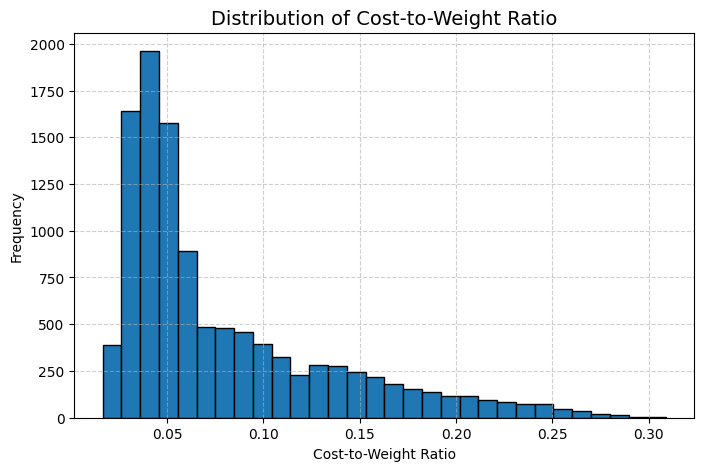

In [42]:
plt.figure(figsize=(8,5))
plt.hist(encode_data['Cost_to_Weight_ratio'], bins=30, edgecolor='black')
plt.title('Distribution of Cost-to-Weight Ratio', fontsize=14)
plt.xlabel('Cost-to-Weight Ratio')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Count Value**

In [43]:
# For target column
print("Target Variable (Reached.on.Time_Y.N):")
print(data['Reached.on.Time_Y.N'].value_counts())
print("\nNormalized Value Counts (Proportion):")
print(data['Reached.on.Time_Y.N'].value_counts(normalize=True))

Target Variable (Reached.on.Time_Y.N):
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

Normalized Value Counts (Proportion):
Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


**Analyzes categorical distributions**

In [44]:
# For all categorical columns
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())
    print("\nNormalized:")
    print(data[col].value_counts(normalize=True))


Column: Warehouse_block
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Normalized:
Warehouse_block
F    0.333303
D    0.166742
A    0.166652
B    0.166652
C    0.166652
Name: proportion, dtype: float64

Column: Mode_of_Shipment
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Normalized:
Mode_of_Shipment
Ship      0.678425
Flight    0.161560
Road      0.160015
Name: proportion, dtype: float64

Column: Product_importance
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Normalized:
Product_importance
low       0.481589
medium    0.432221
high      0.086190
Name: proportion, dtype: float64

Column: Gender
Gender
F    5545
M    5454
Name: count, dtype: int64

Normalized:
Gender
F    0.504137
M    0.495863
Name: proportion, dtype: float64


**Lists column types**

In [45]:
encode_data.select_dtypes(include=['object']).columns
encode_data.dtypes

,0
ID,int64
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,int64
Gender,int64
Discount_offered,int64
Weight_in_gms,int64
Reached.on.Time_Y.N,int64


**Split data for modeling**

In [46]:
X = encode_data.drop(['Reached.on.Time_Y.N', 'Mode_of_Shipment_Reconstructed'], axis=1)
y = encode_data['Reached.on.Time_Y.N']

In [47]:
X

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Cost_to_Weight_ratio
0,1,4,2,177,3,1,0,44,1233,0,0,1,0,0,0,0.143552
1,2,4,5,216,2,1,1,59,3088,0,0,0,1,0,0,0.069948
2,3,2,2,183,4,1,1,48,3374,0,0,0,0,0,0,0.054238
3,4,3,3,176,4,2,1,10,1177,1,0,0,0,0,0,0.149533
4,5,2,2,184,3,2,0,46,2484,0,1,0,0,0,0,0.074074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,2,0,1,1538,0,0,0,0,0,1,0.163849
10995,10996,4,1,232,5,2,0,6,1247,1,0,0,0,0,1,0.186047
10996,10997,5,4,242,5,1,0,4,1155,0,1,0,0,0,1,0.209524
10997,10998,5,2,223,6,2,1,2,1210,0,0,0,1,0,1,0.184298


In [48]:
y

,Reached.on.Time_Y.N
0,1
1,1
2,1
3,1
4,1
...,...
10994,1
10995,0
10996,0
10997,0


**Splits dataset into training and testing**

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Further split training data into train + validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [50]:
# shape of the Training, testing dataset after splitting
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8799, 16)
Testing set shape: (2200, 16)


**Class Distribution**

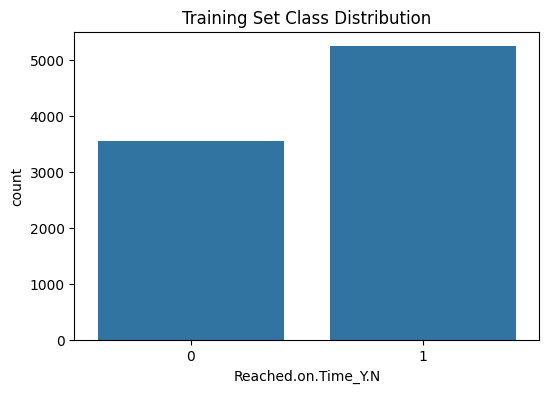

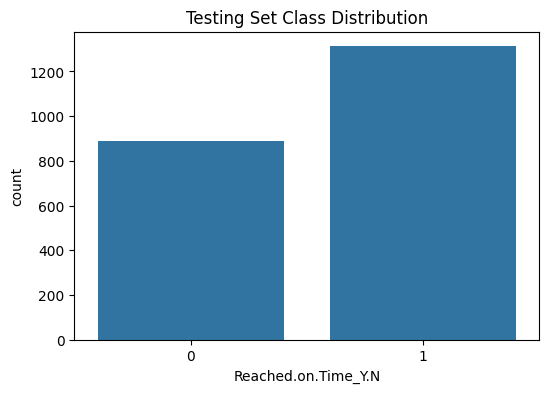

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Training Set Class Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_test)
plt.title("Testing Set Class Distribution")
plt.show()

In [52]:
# Check original class distribution
print("Before SMOTE class distribution:", Counter(y_train))

Before SMOTE class distribution: Counter({1: 5250, 0: 3549})


**SMOTE**

In [53]:
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Apply to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Check new class distribution
print("After SMOTE class distribution:", Counter(y_train_resampled))

After SMOTE class distribution: Counter({0: 5250, 1: 5250})


**before smote & after smote**

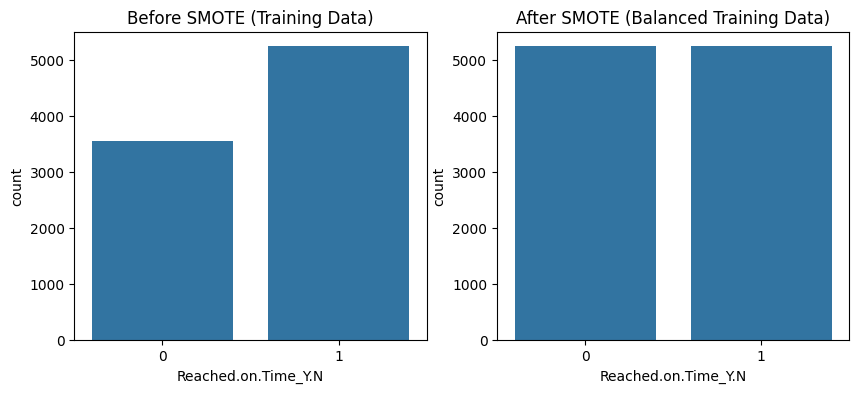

In [54]:
# Visualization before & after
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Before SMOTE (Training Data)")
sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title("After SMOTE (Balanced Training Data)")
plt.show()

**ML models**

**Save the training and testing datasets as CSV files**

**Check if the files exist**

In [55]:
import os

# Check if the files exist
if os.path.exists('train_dataset.csv'):
    print("'train_dataset.csv' exists.")
else:
    print("'train_dataset.csv' does NOT exist.")

if os.path.exists('test_dataset.csv'):
    print("'test_dataset.csv' exists.")
else:
    print("'test_dataset.csv' does NOT exist.")

'train_dataset.csv' does NOT exist.
'test_dataset.csv' does NOT exist.


In [56]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),  # L2 regularization (smaller C = stronger)

    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),

    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),

    "Naive Bayes": GaussianNB(),

    "KNN": KNeighborsClassifier(n_neighbors=9),  # more neighbors → smoother, less overfitting

    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=42),

    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5, use_label_encoder=False, eval_metric='logloss', random_state=42),

    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,num_leaves=20, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),

    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}

**Result**

In [57]:
results = []

for name, model in models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])

    # Cross-validation accuracy (10-fold)
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

    results.append({
        'Model': name,
        'Mean CV Accuracy': round(np.mean(cv_scores), 4),
        'Std Dev': round(np.std(cv_scores), 4)
    })

results_df = pd.DataFrame(results).sort_values(by='Mean CV Accuracy', ascending=False)
print("\n Cross-validation results (Overfitting check):")
print(results_df)


 Cross-validation results (Overfitting check):
                 Model  Mean CV Accuracy  Std Dev
3          Naive Bayes            0.6874   0.0092
2        Random Forest            0.6825   0.0091
5                  SVM            0.6819   0.0122
1        Decision Tree            0.6817   0.0096
8             CatBoost            0.6641   0.0130
7             LightGBM            0.6609   0.0163
6              XGBoost            0.6558   0.0134
4                  KNN            0.6544   0.0113
0  Logistic Regression            0.6535   0.0114


**Evaluates ML model performance**

In [58]:
# Fix random seed for consistency
RND = 42
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RND)
# Define models with anti-overfitting hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=RND),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=4, random_state=RND),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5,
                                            min_samples_leaf=3, max_features='sqrt', random_state=RND),
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=RND),
    "XGBoost": XGBClassifier(max_depth=4, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
                             reg_lambda=1, n_estimators=200, random_state=RND, eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(num_leaves=20, max_depth=6, subsample=0.8, reg_lambda=0.5,
                               learning_rate=0.05, n_estimators=200, random_state=RND),
    "CatBoost": CatBoostClassifier(depth=6, learning_rate=0.05, l2_leaf_reg=3, n_estimators=200,
                                   verbose=0, random_state=RND)
}

**cross-validation**

In [59]:
# Run cross-validation to check improvement
cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    cv_results.append({
        "Model": name,
        "Mean CV Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    })

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:07:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:07:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:07:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:07:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:07:32] WARNING: /w

[LightGBM] [Info] Number of positive: 4725, number of negative: 3194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 7919, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596666 -> initscore=0.391594
[LightGBM] [Info] Start training from score 0.391594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

**Result**

In [60]:
# Display results
cv_df = pd.DataFrame(cv_results).sort_values(by="Mean CV Accuracy", ascending=False)
print("\nCross-validation results (After Regularization to Fix Overfitting):")
print(cv_df.to_string(index=False))


Cross-validation results (After Regularization to Fix Overfitting):
              Model  Mean CV Accuracy  Std Dev
                SVM          0.688373 0.010290
        Naive Bayes          0.686214 0.008730
      Decision Tree          0.681100 0.006851
      Random Forest          0.676897 0.012086
           CatBoost          0.674737 0.008961
            XGBoost          0.673827 0.010833
           LightGBM          0.670987 0.013449
Logistic Regression          0.655076 0.011701
                KNN          0.654395 0.013426


**Evaluates ML model performance**

In [61]:
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}

**Evaluates ML model performance**


 Training and evaluating Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       710
           1       0.74      0.67      0.70      1050

    accuracy                           0.66      1760
   macro avg       0.65      0.66      0.65      1760
weighted avg       0.67      0.66      0.66      1760


 Training and evaluating Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.58      0.89      0.71       710
           1       0.89      0.57      0.69      1050

    accuracy                           0.70      1760
   macro avg       0.73      0.73      0.70      1760
weighted avg       0.76      0.70      0.70      1760


 Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       710
           1       

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:08:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       710
           1       0.99      0.94      0.96      1050

    accuracy                           0.96      1760
   macro avg       0.95      0.96      0.96      1760
weighted avg       0.96      0.96      0.96      1760


 Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

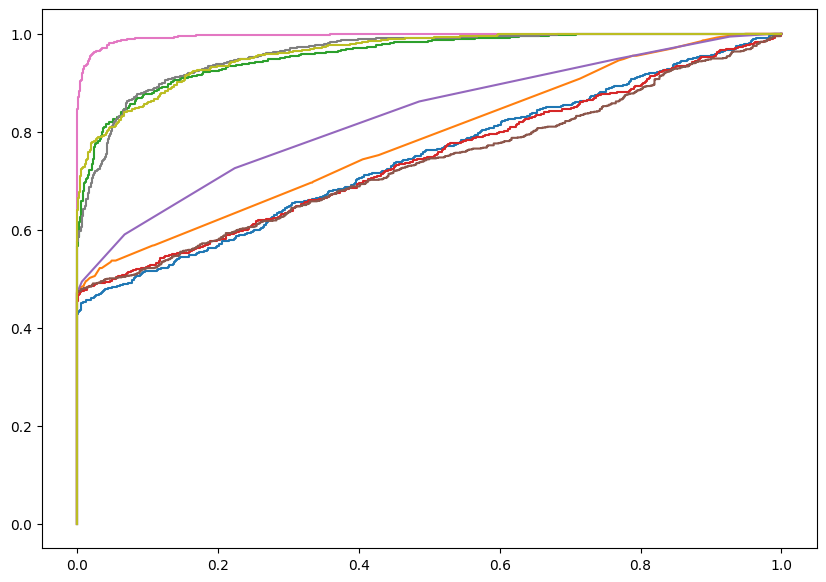

In [62]:
# --- Store results ---
results = {}
comparison = []

plt.figure(figsize=(10, 7))
for name, model in models.items():
    print(f"\n Training and evaluating {name}...")

    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]

    # Metrics
    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_prob)

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_val, y_val_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })

**ROC-AUC Curve Comparison**

/tmp/ipython-input-2136409572.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


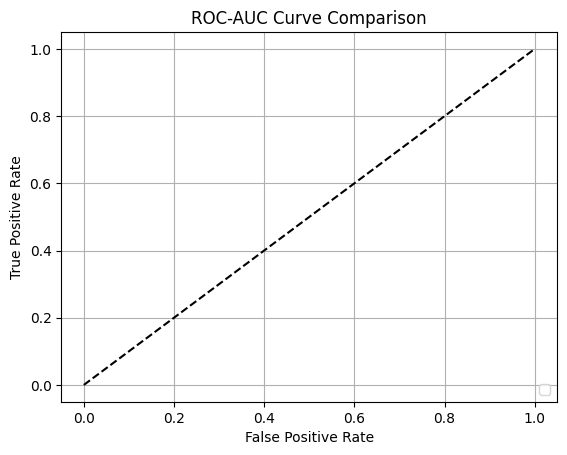

In [63]:
# --- Plot ROC Curve ---
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC-AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Comparison Table**

In [64]:
# --- Final Comparison Table ---
comparison_df = pd.DataFrame(comparison).sort_values(by='ROC-AUC', ascending=False)
print("\nFinal Model Comparison Table:")
print(comparison_df)


Final Model Comparison Table:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
6              XGBoost    0.9585     0.9890  0.9410    0.9644   0.9960
8             CatBoost    0.8591     0.9774  0.7819    0.8688   0.9609
7             LightGBM    0.8665     0.9605  0.8095    0.8786   0.9603
2        Random Forest    0.7705     0.9954  0.6181    0.7626   0.9568
4                  KNN    0.7460     0.8274  0.7257    0.7732   0.8298
1        Decision Tree    0.6989     0.8869  0.5676    0.6922   0.7837
0  Logistic Regression    0.6608     0.7382  0.6686    0.7016   0.7448
3          Naive Bayes    0.6824     0.9823  0.4762    0.6414   0.7437
5                  SVM    0.6864     0.9698  0.4895    0.6506   0.7348


 **ML models**

In [65]:
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}


Training and Evaluating: Logistic Regression
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       710
           1       0.74      0.67      0.70      1050

    accuracy                           0.66      1760
   macro avg       0.65      0.66      0.65      1760
weighted avg       0.67      0.66      0.66      1760



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


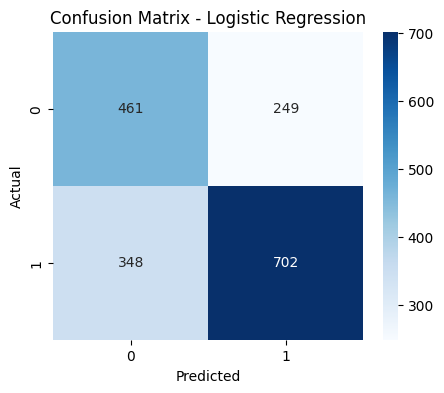

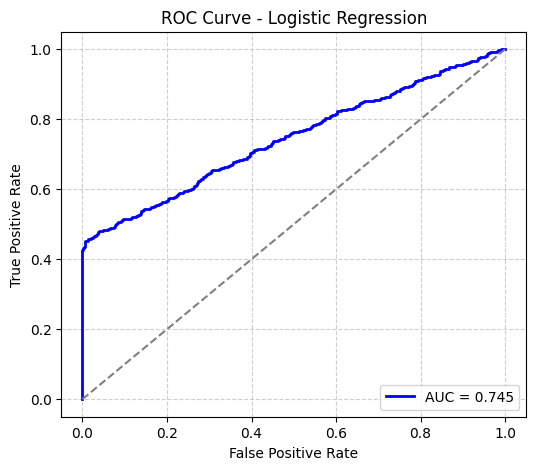


Training and Evaluating: Decision Tree
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.89      0.71       710
           1       0.89      0.57      0.69      1050

    accuracy                           0.70      1760
   macro avg       0.73      0.73      0.70      1760
weighted avg       0.76      0.70      0.70      1760



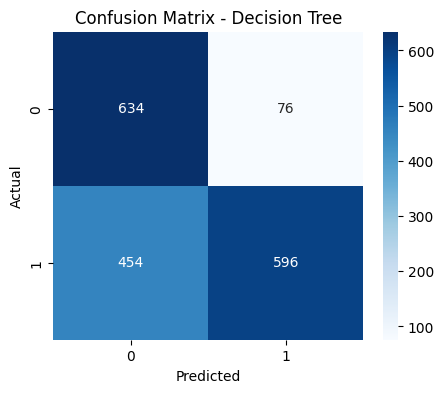

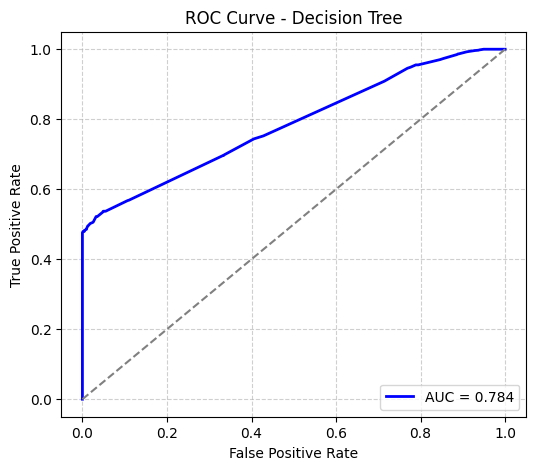


Training and Evaluating: Random Forest
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       710
           1       1.00      0.62      0.76      1050

    accuracy                           0.77      1760
   macro avg       0.82      0.81      0.77      1760
weighted avg       0.85      0.77      0.77      1760



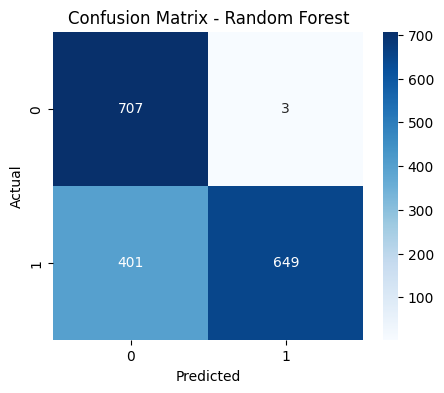

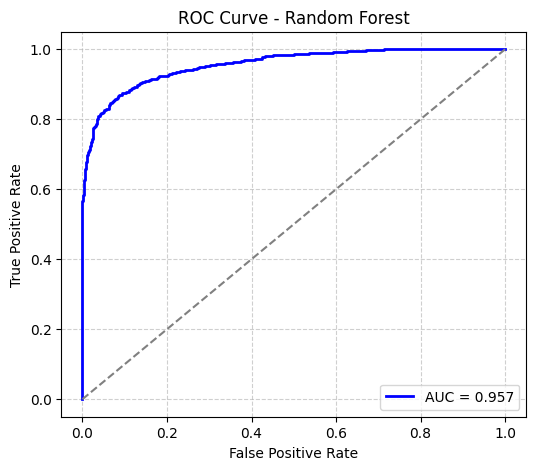


Training and Evaluating: Naive Bayes
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.99      0.71       710
           1       0.98      0.48      0.64      1050

    accuracy                           0.68      1760
   macro avg       0.77      0.73      0.68      1760
weighted avg       0.81      0.68      0.67      1760



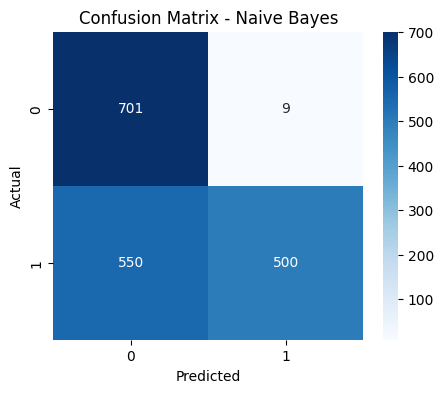

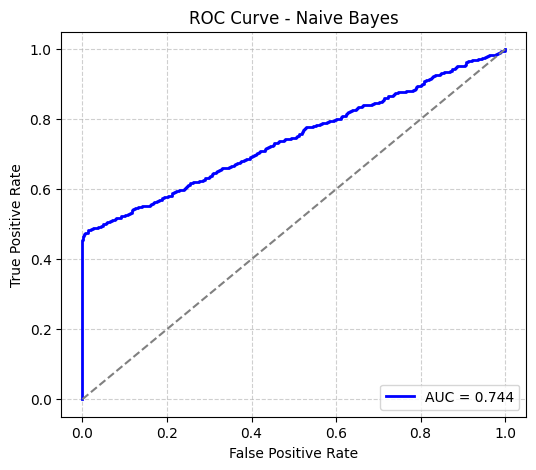


Training and Evaluating: KNN
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.78      0.71       710
           1       0.83      0.73      0.77      1050

    accuracy                           0.75      1760
   macro avg       0.74      0.75      0.74      1760
weighted avg       0.76      0.75      0.75      1760



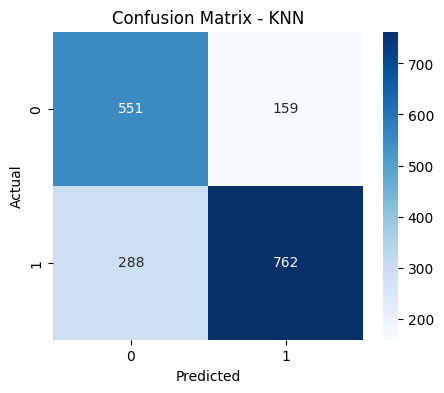

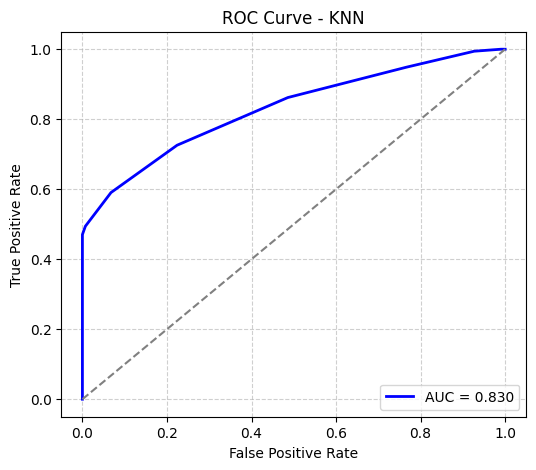


Training and Evaluating: SVM
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.72       710
           1       0.97      0.49      0.65      1050

    accuracy                           0.69      1760
   macro avg       0.77      0.73      0.68      1760
weighted avg       0.81      0.69      0.68      1760



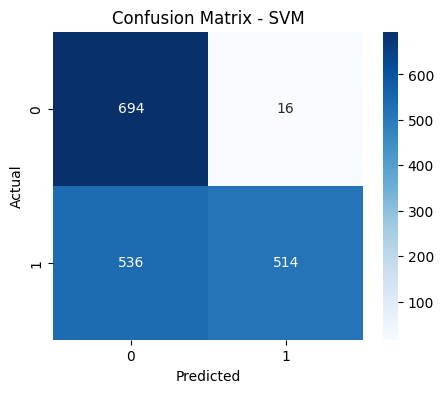

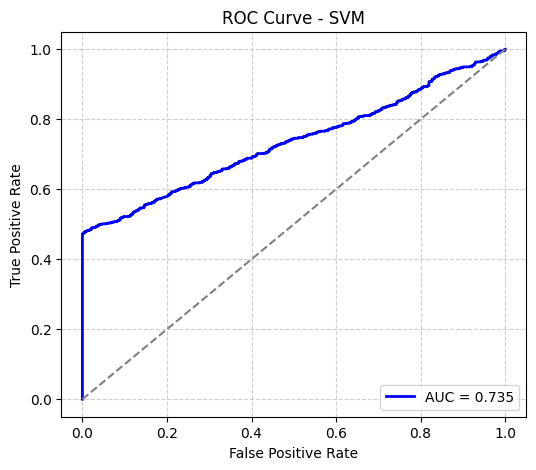


Training and Evaluating: XGBoost
----------------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:08:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       710
           1       0.99      0.94      0.96      1050

    accuracy                           0.96      1760
   macro avg       0.95      0.96      0.96      1760
weighted avg       0.96      0.96      0.96      1760



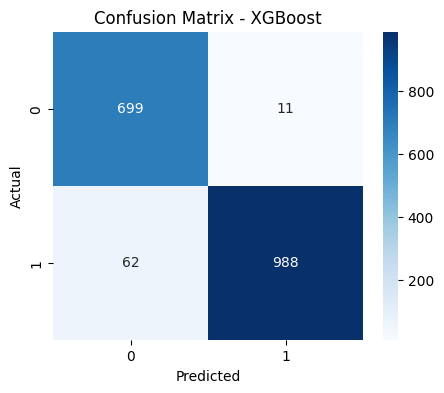

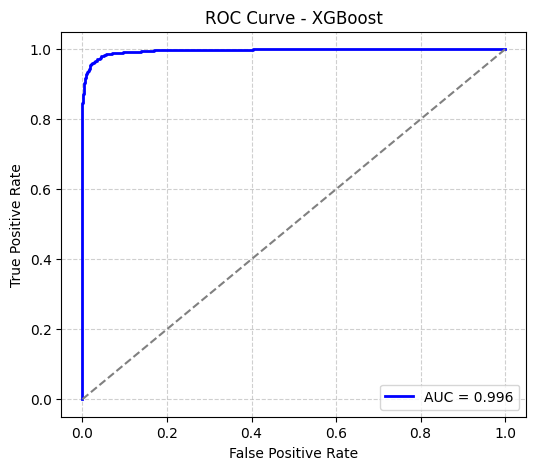


Training and Evaluating: LightGBM
----------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

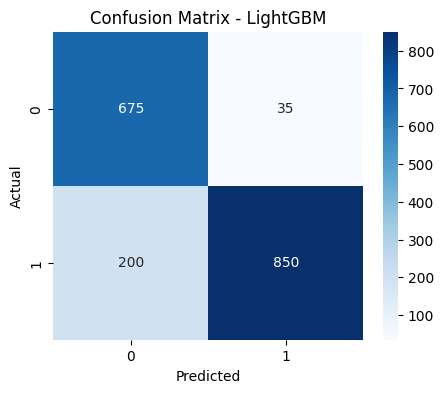

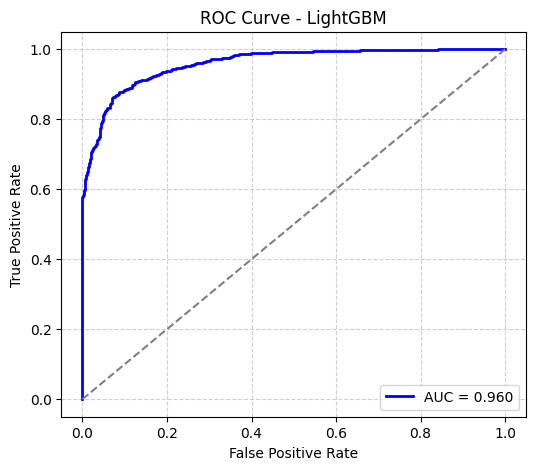


Training and Evaluating: CatBoost
----------------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       710
           1       0.98      0.78      0.87      1050

    accuracy                           0.86      1760
   macro avg       0.86      0.88      0.86      1760
weighted avg       0.89      0.86      0.86      1760



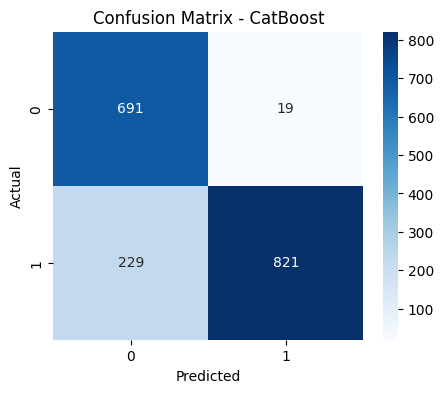

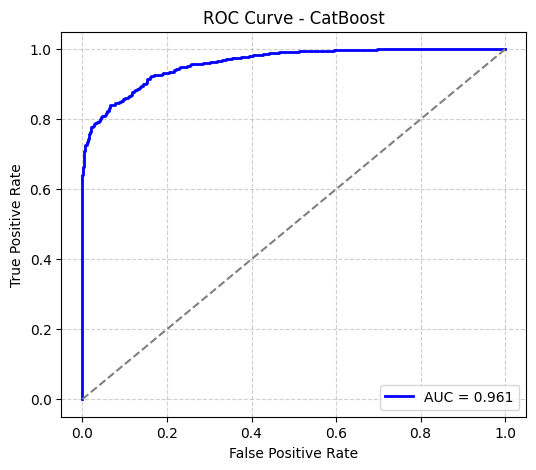

In [66]:
comparison = []

for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    print("-" * 70)

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)


    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))


    plt.figure(figsize=(5,4))
    sns.heatmap(pd.crosstab(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Store Results
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })

In [67]:
comparison_df = pd.DataFrame(comparison).sort_values(by="ROC-AUC", ascending=False)
print("\nFinal Model Comparison Table:")
print(comparison_df)


Final Model Comparison Table:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
6              XGBoost    0.9585     0.9890  0.9410    0.9644   0.9960
8             CatBoost    0.8591     0.9774  0.7819    0.8688   0.9609
7             LightGBM    0.8665     0.9605  0.8095    0.8786   0.9603
2        Random Forest    0.7705     0.9954  0.6181    0.7626   0.9568
4                  KNN    0.7460     0.8274  0.7257    0.7732   0.8298
1        Decision Tree    0.6989     0.8869  0.5676    0.6922   0.7837
0  Logistic Regression    0.6608     0.7382  0.6686    0.7016   0.7448
3          Naive Bayes    0.6824     0.9823  0.4762    0.6414   0.7437
5                  SVM    0.6864     0.9698  0.4895    0.6506   0.7348


**save mode**

In [68]:
import joblib
import os

# Re-define models to ensure it's available in the current scope
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}

# Assuming the best model is XGBoost based on previous evaluation
best_model_name = "XGBoost"
best_model = models[best_model_name]

# Define the filename
model_filename = 'xgboost_best_model.pkl'

# Save the model
joblib.dump(best_model, model_filename)

print(f"Model '{best_model_name}' saved successfully as '{model_filename}'")

Model 'XGBoost' saved successfully as 'xgboost_best_model.pkl'


**Save model**

In [69]:
import joblib
import os

# Assuming the 'models' dictionary from cell '1cCp7tbTt762' contains the fitted models.
# We do NOT redefine 'models' here, but use the one already in the kernel's memory.

best_model_name = "XGBoost"
# Access the already fitted model from the 'models' dictionary
# that was populated by the training loop in cell '1cCp7tbTt762'.
best_model = models[best_model_name]

# Define the filename
model_filename = 'xgboost_best_model.pkl'

# Save the fitted model
joblib.dump(best_model, model_filename)

print(f"Model '{best_model_name}' saved successfully as '{model_filename}'")

Model 'XGBoost' saved successfully as 'xgboost_best_model.pkl'


**check model is saved or not**

In [70]:

import os

model_filename = 'xgboost_best_model.pkl'
if os.path.exists(model_filename):
    print(f"The model '{model_filename}' has been successfully saved.")
else:
    print(f"The model '{model_filename}' was not found. Please ensure the training and saving process completed successfully.")

The model 'xgboost_best_model.pkl' has been successfully saved.


**Load dataset**

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("Train new.csv")

**Load the XGBoost model**

In [72]:
import joblib

# Load the XGBoost model from the file
loaded_model = joblib.load('xgboost_best_model.pkl')

print("XGBoost model loaded successfully.")

XGBoost model loaded successfully.


**predict output**

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
from xgboost import XGBClassifier # Import explicitly for clarity

# Load the dataset
data = pd.read_csv("Train new.csv")

# Load the XGBoost model from the file
loaded_model = joblib.load('xgboost_best_model.pkl')
print("XGBoost model loaded successfully.")

# --- Re-fit the loaded model to ensure its internal state is properly initialized ---
# This step ensures the model is truly 'fitted' in the current environment
# and can prevent NotFittedError even if joblib.load isn't perfect for XGBoost's C++ booster.
if 'X_train' in globals() and 'y_train' in globals():
    loaded_model.fit(X_train, y_train)
    print("Loaded XGBoost model has been re-fitted on training data to ensure readiness.")
else:
    print("Warning: X_train or y_train not found. Cannot re-fit loaded model. Ensure training data is loaded.")

# Initialize and fit LabelEncoder for Product_importance on the full data
le_product_importance = LabelEncoder()
le_product_importance.fit(data['Product_importance'])

# Initialize and fit LabelEncoder for Gender on the full data
le_gender = LabelEncoder()
le_gender.fit(data['Gender'])

# Initialize and fit StandardScaler on the numerical columns of the full data
std_scaler = StandardScaler()
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# Create a temporary dataframe for fitting scaler to avoid modifying original 'data'
temp_data_for_scaler = data[num_cols].copy()
std_scaler.fit(temp_data_for_scaler)

# You can change the value of 'selected_warehouse_block' to any block (e.g., 'A', 'B', 'C', 'D', 'F')
selected_warehouse_block = "A" # @param ["A", "B", "C", "D", "F"] {"allow-input":true}

if 'data' in locals() and data is not None:
    print(f"Processing shipments from Warehouse Block: {selected_warehouse_block}\n")

    # Filter the original DataFrame
    filtered_raw_data = data[data['Warehouse_block'] == selected_warehouse_block].copy()

    if filtered_raw_data.empty:
        print(f"No shipments found for Warehouse Block: {selected_warehouse_block}")
        display(filtered_raw_data) # Display empty DataFrame
    else:
        # --- Preprocessing steps on filtered_raw_data (mimicking encode_data and X_train creation) ---
        processed_filtered_data = filtered_raw_data.copy()

        # 1. Label Encode (Product_importance, Gender)
        if 'Product_importance' in processed_filtered_data.columns:
            processed_filtered_data['Product_importance'] = le_product_importance.transform(processed_filtered_data['Product_importance'])
        if 'Gender' in processed_filtered_data.columns:
            processed_filtered_data['Gender'] = le_gender.transform(processed_filtered_data['Gender'])

        # 2. One-Hot Encode (Warehouse_block, Mode_of_Shipment)
        processed_filtered_data = pd.get_dummies(processed_filtered_data,
                                                 columns=['Warehouse_block', 'Mode_of_Shipment'],
                                                 drop_first=True)

        # 3. Convert boolean columns to int
        for col in processed_filtered_data.select_dtypes(include=['bool']).columns:
            processed_filtered_data[col] = processed_filtered_data[col].astype(int)

        # 4. Feature Engineering: Cost_to_Weight_ratio
        processed_filtered_data['Cost_to_Weight_ratio'] = processed_filtered_data['Cost_of_the_Product'] / processed_filtered_data['Weight_in_gms']
        processed_filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)

        # If any NaNs are created by division by zero, fill them with the median of valid ratios
        if processed_filtered_data['Cost_to_Weight_ratio'].isnull().any():
            processed_filtered_data['Cost_to_Weight_ratio'].fillna(processed_filtered_data['Cost_to_Weight_ratio'].median(), inplace=True)

        # 5. Drop 'ID' column and ensure column alignment with X_train
        if 'ID' in processed_filtered_data.columns:
            processed_filtered_data = processed_filtered_data.drop(columns=['ID'])

        # 'X_train' should be available from cell 3bIVESssnYQm
        # Add missing columns (that might not appear in a subset) with 0, and ensure order
        # For this to work, X_train must be available in the kernel state.
        # If X_train is not available, you would need to generate code to recreate it here.
        if 'X_train' in globals():
            missing_cols = set(X_train.columns) - set(processed_filtered_data.columns)
            for c in missing_cols:
                processed_filtered_data[c] = 0
            processed_filtered_data = processed_filtered_data[X_train.columns]
        else:
            print("Warning: X_train not found. Column alignment might be incorrect for prediction.")

        # 6. Standard Scaling on numerical features
        if std_scaler is not None and num_cols is not None:
            cols_to_scale = [col for col in num_cols if col in processed_filtered_data.columns]
            if cols_to_scale:
                processed_filtered_data[cols_to_scale] = std_scaler.transform(processed_filtered_data[cols_to_scale])
        else:
            print("Warning: StandardScaler or num_cols not found. Skipping numerical scaling.")

        # --- Make predictions using the loaded XGBoost model ---
        if loaded_model is not None:
            predictions = loaded_model.predict(processed_filtered_data)
            probabilities = loaded_model.predict_proba(processed_filtered_data)

            # Add predictions and probabilities to the *original filtered data* for display
            filtered_raw_data['Predicted_Reached_on_Time_Y.N'] = predictions
            filtered_raw_data['Prob_Class_0'] = probabilities[:, 0]
            filtered_raw_data['Prob_Class_1'] = probabilities[:, 1]

            print(f"Number of shipments in {selected_warehouse_block}: {len(filtered_raw_data)}")
            print(f"Predictions for Warehouse Block: {selected_warehouse_block}")
            display(filtered_raw_data.head())
        else:
            print("Error: XGBoost model ('loaded_model') is not available.")

else:
    print("Cannot filter as DataFrame 'data' is not loaded or available. Please ensure 'data' is loaded.")

XGBoost model loaded successfully.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:08:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Loaded XGBoost model has been re-fitted on training data to ensure readiness.
Processing shipments from Warehouse Block: A

Number of shipments in A: 1833
Predictions for Warehouse Block: A


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Predicted_Reached_on_Time_Y.N,Prob_Class_0,Prob_Class_1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,1,0.000769,0.999231
8,9,A,Flight,3,4,150,3,low,F,11,1861,1,1,0.000550,0.999450
14,15,A,Flight,4,3,152,3,low,M,43,1009,1,1,0.001208,0.998792
20,21,A,Ship,3,3,161,2,medium,F,38,1521,1,1,0.000574,0.999426
26,27,A,Ship,4,1,172,3,high,F,24,1066,1,1,0.000934,0.999066
